In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()
data.info()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
data["Exited"].value_counts(normalize=True)
#0:retained
#1:churned

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [5]:
#data cleaning
df = data.copy()

df.drop(
    columns=["RowNumber", "CustomerId", "Surname"],
    inplace=True
)


In [6]:
# Label Encoding for binary category
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

# One-Hot Encoding for Geography
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)


In [7]:
X = df.drop("Exited", axis=1)
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
#log regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]


In [10]:
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results
Accuracy: 0.8092
Precision: 0.5987654320987654
Recall: 0.1905697445972495
ROC-AUC: 0.7836255290260001
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1991
           1       0.60      0.19      0.29       509

    accuracy                           0.81      2500
   macro avg       0.71      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500



In [11]:
#random forest model
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))



Random Forest Results
Accuracy: 0.8744
Precision: 0.8305084745762712
Recall: 0.481335952848723
ROC-AUC: 0.8703645777314222


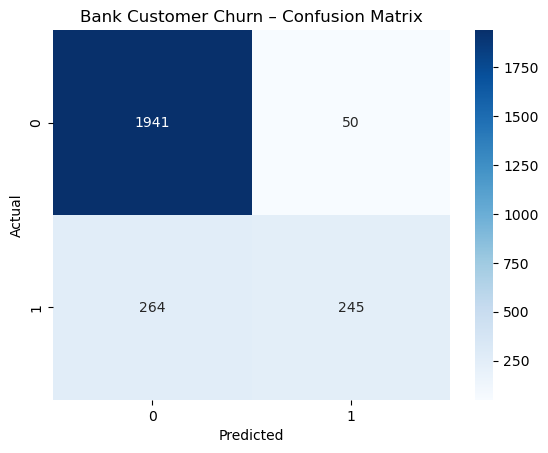

In [12]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Bank Customer Churn – Confusion Matrix")
plt.show()


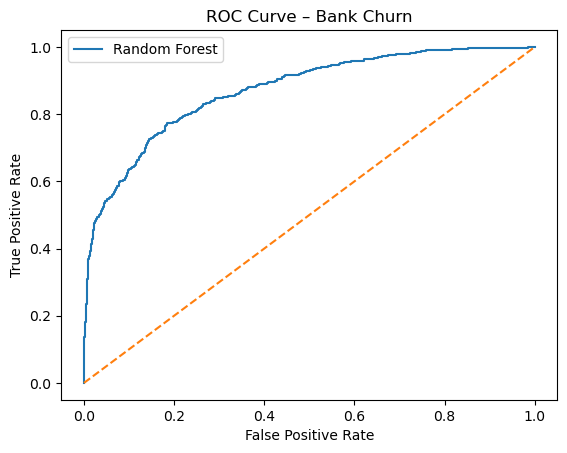

In [13]:
#roc curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Bank Churn")
plt.legend()
plt.show()


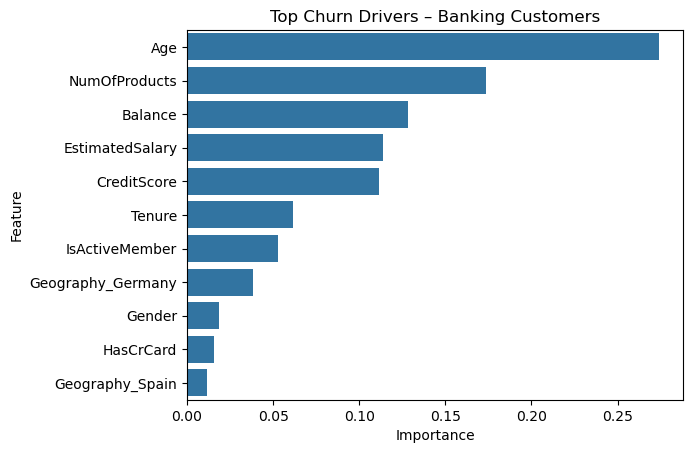

In [14]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance
)
plt.title("Top Churn Drivers – Banking Customers")
plt.show()


In [15]:
results = X_test.copy()
results["Actual_Churn"] = y_test.values
results["Churn_Probability"] = y_prob_rf

results.sort_values("Churn_Probability", ascending=False).head(10)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Actual_Churn,Churn_Probability
2614,546,0,58,3,106458.31,4,1,0,128881.87,True,False,1,0.970446
6831,469,0,52,8,139493.25,3,0,0,150093.32,True,False,1,0.969525
2462,672,0,53,9,169406.33,4,1,1,147311.47,False,False,1,0.948063
8673,765,0,56,1,0.00,1,1,0,13228.93,False,False,1,0.940762
9540,727,1,46,3,115248.11,4,1,0,130752.01,True,False,1,0.937512
6255,547,1,55,4,111362.76,3,1,0,16922.28,True,False,1,0.930172
5750,747,1,37,9,135776.36,3,1,0,85470.45,True,False,1,0.930120
4842,683,1,56,7,50911.21,3,0,0,97629.31,False,True,1,0.927870
880,749,0,60,6,0.00,1,1,0,17978.68,False,False,1,0.922421
8396,607,0,48,4,112070.86,3,1,0,173568.30,False,False,1,0.921688


In [ ]:
#NOW WE WILL USE XGBOOST FOR COMPARISON

In [20]:
from xgboost import XGBClassifier


In [21]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
scale_pos_weight
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
print("XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Results
Accuracy: 0.8304
Precision: 0.5682182985553772
Recall: 0.6954813359528488
ROC-AUC: 0.8637542812992454
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1991
           1       0.57      0.70      0.63       509

    accuracy                           0.83      2500
   macro avg       0.74      0.78      0.76      2500
weighted avg       0.85      0.83      0.84      2500



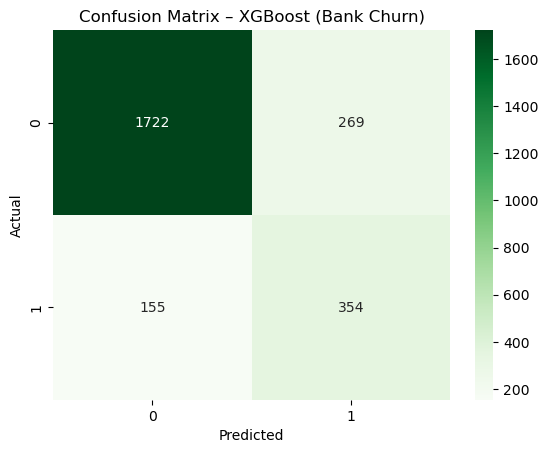

In [23]:
cm = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – XGBoost (Bank Churn)")
plt.show()


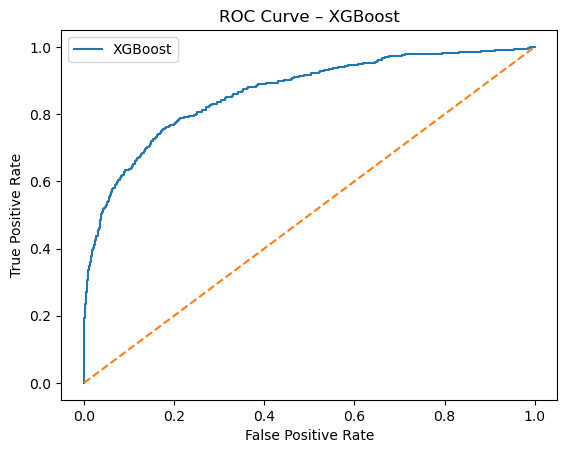

In [24]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost")
plt.legend()
plt.show()


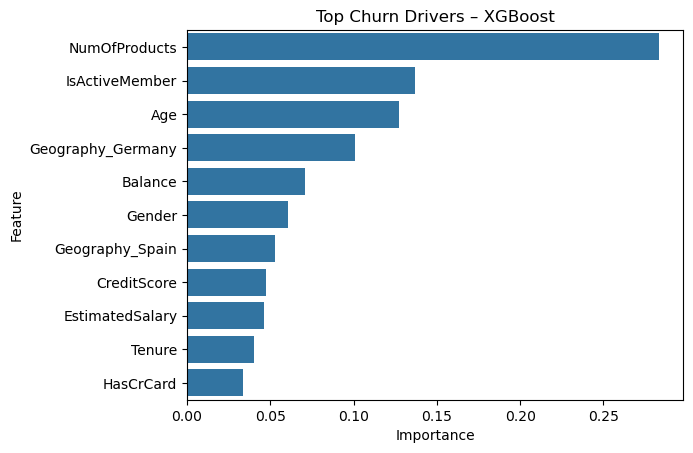

In [25]:
feature_importance_xgb = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_xgb
)
plt.title("Top Churn Drivers – XGBoost")
plt.show()


In [26]:
results_xgb = X_test.copy()
results_xgb["Actual_Churn"] = y_test.values
results_xgb["Churn_Probability"] = y_prob_xgb

results_xgb.sort_values("Churn_Probability", ascending=False).head(10)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Actual_Churn,Churn_Probability
2614,546,0,58,3,106458.31,4,1,0,128881.87,True,False,1,0.999373
6255,547,1,55,4,111362.76,3,1,0,16922.28,True,False,1,0.998703
70,738,1,58,2,133745.44,4,1,0,28373.86,True,False,1,0.998455
2462,672,0,53,9,169406.33,4,1,1,147311.47,False,False,1,0.998292
9540,727,1,46,3,115248.11,4,1,0,130752.01,True,False,1,0.998291
3549,675,0,61,5,62055.17,3,1,0,166305.16,False,False,1,0.997850
6831,469,0,52,8,139493.25,3,0,0,150093.32,True,False,1,0.997534
5950,834,0,57,8,112281.60,3,1,0,140225.14,True,False,1,0.997527
5010,575,1,49,7,121205.15,4,1,1,168080.53,True,False,1,0.996401
7457,665,0,43,2,116322.27,4,1,0,35640.12,True,False,1,0.996354


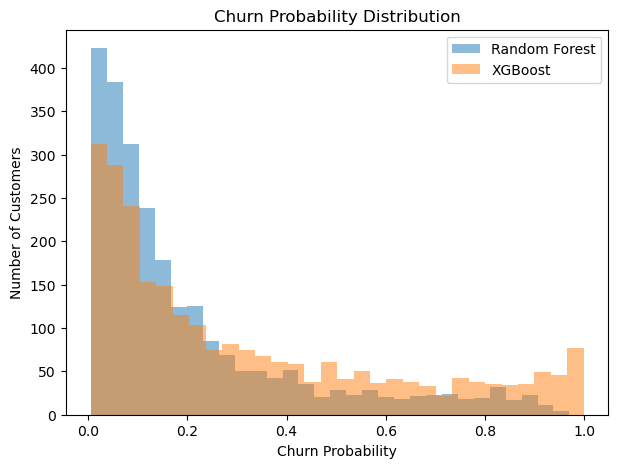

In [28]:
plt.figure(figsize=(7,5))
plt.hist(y_prob_rf, bins=30, alpha=0.5, label="Random Forest")
plt.hist(y_prob_xgb, bins=30, alpha=0.5, label="XGBoost")

plt.xlabel("Churn Probability")
plt.ylabel("Number of Customers")
plt.title("Churn Probability Distribution")
plt.legend()
plt.show()



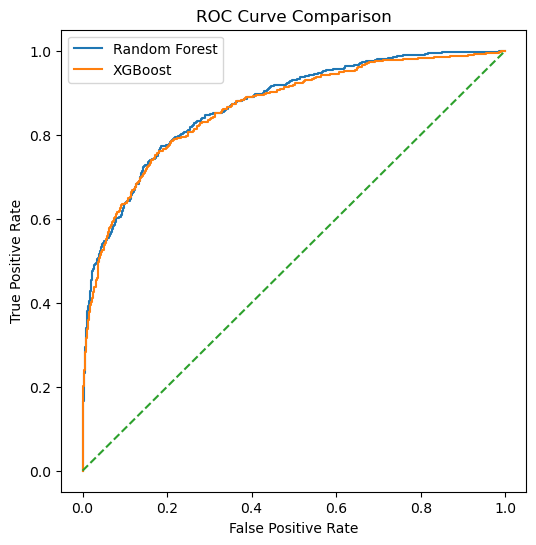

In [29]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(6,6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [30]:
import joblib

joblib.dump(xgb, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']